# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.





# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

In [90]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Basic operations on CNBC headlines dataset

In [91]:
cnbc = pd.read_csv('cnbc_headlines.csv')

In [92]:
cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [93]:
cnbc.shape

(3080, 3)

In [94]:
cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [95]:
cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [96]:
cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

`There are 280 missing values in headlines, description and time`

In [97]:
cnbc.dropna(inplace=True)

In [98]:
cnbc.duplicated().sum()

0

In [102]:
cnbc.drop_duplicates( keep='first', inplace=True)

In [103]:
cnbc.shape

(2800, 3)

## Basic operations on Gaurdian headlines dataset

In [104]:
guardian = pd.read_csv('guardian_headlines.csv')

In [105]:
guardian.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [106]:
guardian.shape

(17800, 2)

In [107]:
guardian.columns

Index(['Time', 'Headlines'], dtype='object')

In [108]:
guardian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [109]:
guardian.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [110]:
guardian.drop_duplicates(keep='first', inplace=True)

In [111]:
guardian.shape

(17800, 2)

# Basic operations on Reuters headlines

In [112]:
reuters = pd.read_csv('reuters_headlines.csv')

In [113]:
reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [114]:
reuters.shape

(32770, 3)

In [115]:
reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [116]:
reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [117]:
reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [118]:
reuters.drop_duplicates(keep='first', inplace=True)

In [119]:
reuters.shape

(32715, 3)

### Preprocessing

- Lowercase

- Removing punctuations

- Removing stopwords

- Stemming

- Lemmatizing

In [120]:
def preprocessing_text(data):

    #lowercase
    data = data.lower()


    #Removing puntuations
    data = re.sub(r'[^\w\s]','', data, flags=re.MULTILINE)


    #Removing stopwords
    tokens = word_tokenize(data)
    word_tokens = [w for w in tokens if w not in stopwords]
  

    #Stemming
    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(w) for w in word_tokens]
    

    #Lemmatizing
    lemmer = WordNetLemmatizer()
    lem_words = [lemmer.lemmatize(w) for w in stem_words]
 
    return " ".join(lem_words)

### SENTIMENT ANAYSIS

`Our dataset doesn't have a target attribute. `

`So to add a target attribute to the dataset, we will use SentimentIntensityAnalyzer from NLTK library which assigns polarity intensity scores for given string based on lexical meaning of the text.`

In [121]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [122]:
# fuction to decide sentiment as positive, negative and neutral

def mapper(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentiment_analysis(df, colm_name):
    
    # assigning polarity scores for description column
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))
    
    # picking only compound score(combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
    
    # mapping the compound score to positive, negative or neutral
    df['ds_score'] = df['compound_score'].apply(mapper)
    
    df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)
    
    return df


## Working with description of datasets

In [123]:
# concatenating cnbc headlines dataset and reuters headlines dataset (as only those two dataset have description)

cnbc_reuters = pd.concat([cnbc, reuters], axis=0)

In [124]:
cnbc_reuters.shape

(35515, 3)

In [125]:
cnbc_reu = cnbc_reuters.copy()

In [126]:
cnbc_reu['Description'] = cnbc_reu['Description'].apply(preprocessing_text)
cnbc_reu.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...


In [127]:
df = sentiment_analysis(cnbc_reu, 'Description')
df.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative


### In the above dataframe, we have added the target attribute with 3 classes (Positive, Negative, Neutral)

In [128]:
df['ds_score'].value_counts()

Positive    15067
Negative    12279
Neutral      8169
Name: ds_score, dtype: int64

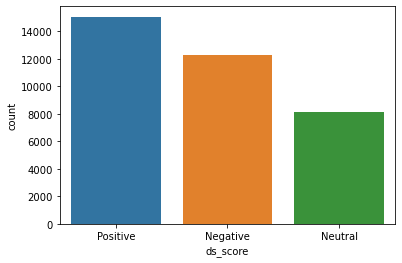

In [129]:
sns.countplot(x='ds_score', data=df);

#### Based on the description of dataset

there are, 

`15067 positive statments`

`12279 negative statments`

`8169 neutral statments`

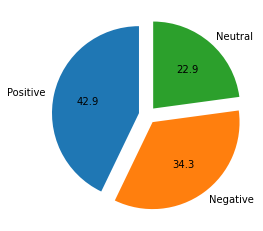

In [130]:
# pie chart 
plt.pie([15000, 12000, 8000], explode=[0.1,0.1,0.1], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()

#### Above plot gives a clear distribution of three class types of target attribute.

`42.9% positive statments`

`34.3% negtive statements`

`22.9% neutral statments`

# Modelling on description based dataset

In [131]:
from sklearn.model_selection import train_test_split

X = df['Description']
y = df.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31963,) (3552,) (31963,) (3552,)


# ML Classification algorithms -> Comparing their Performances

### LINEAR SUPPORT VECTOR MACHINE

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score


# Fit the pipeline to the data
lin_svc_ds = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_ds.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_ds.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.932713963963964
[[1123   45   71]
 [  22  762   20]
 [  50   31 1428]]
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.92      1239
     Neutral       0.91      0.95      0.93       804
    Positive       0.94      0.95      0.94      1509

    accuracy                           0.93      3552
   macro avg       0.93      0.93      0.93      3552
weighted avg       0.93      0.93      0.93      3552



### LOGISTIC REGRESSION

In [133]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression


# Fit the pipeline to the data
log_reg_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_ds.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_ds.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LOGISTIC REGRESSION
accuarcy score:  0.893581081081081
[[1054   78  107]
 [  39  728   37]
 [  69   48 1392]]
              precision    recall  f1-score   support

    Negative       0.91      0.85      0.88      1239
     Neutral       0.85      0.91      0.88       804
    Positive       0.91      0.92      0.91      1509

    accuracy                           0.89      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.89      0.89      0.89      3552



### MULTINOMIAL NAIVE BAYES

In [134]:
from sklearn.naive_bayes import MultinomialNB


# Fit the pipeline to the data
multi_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = multi_nb_ds.predict(X_test)

print("MODEL: Multinomial NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Multinomial NB
accuarcy score:  0.6396396396396397
[[ 808    8  423]
 [ 150   86  568]
 [ 128    3 1378]]
              precision    recall  f1-score   support

    Negative       0.74      0.65      0.70      1239
     Neutral       0.89      0.11      0.19       804
    Positive       0.58      0.91      0.71      1509

    accuracy                           0.64      3552
   macro avg       0.74      0.56      0.53      3552
weighted avg       0.71      0.64      0.59      3552



### BERNOULLI NAIVE BAYES

In [135]:
from sklearn.naive_bayes import BernoulliNB


# Fit the pipeline to the data
bern_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('bern_nb', BernoulliNB())])

bern_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = bern_nb_ds.predict(X_test)

print("MODEL: Bernoulli's NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Bernoulli's NB
accuarcy score:  0.7395833333333334
[[ 919   56  264]
 [ 135  480  189]
 [ 210   71 1228]]
              precision    recall  f1-score   support

    Negative       0.73      0.74      0.73      1239
     Neutral       0.79      0.60      0.68       804
    Positive       0.73      0.81      0.77      1509

    accuracy                           0.74      3552
   macro avg       0.75      0.72      0.73      3552
weighted avg       0.74      0.74      0.74      3552



### GRADIENT BOOSTING CLASSIFICATION MODEL

In [136]:
from sklearn.ensemble import GradientBoostingClassifier


# Fit the pipeline to the data
grad_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('grad_boost', GradientBoostingClassifier())])

grad_boost_ds.fit(X_train, y_train)

# predict on test dataset
pred = grad_boost_ds.predict(X_test)

print("MODEL: Gradient Boosting")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Gradient Boosting
accuarcy score:  0.8386824324324325
[[ 902  168  169]
 [  11  784    9]
 [  69  147 1293]]
              precision    recall  f1-score   support

    Negative       0.92      0.73      0.81      1239
     Neutral       0.71      0.98      0.82       804
    Positive       0.88      0.86      0.87      1509

    accuracy                           0.84      3552
   macro avg       0.84      0.85      0.83      3552
weighted avg       0.86      0.84      0.84      3552



### XGBOOST CLASSIFICATION MODEL

In [137]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Fit the pipeline to the data
xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xg_boost_ds.fit(X_train, enc_train)

# predict on test dataset
pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred))

#print confusion matrix
print(confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))

MODEL: XG Boost
accuarcy score:  0.8856981981981982
[[ 996  128  115]
 [  12  785    7]
 [  53   91 1365]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1239
           1       0.78      0.98      0.87       804
           2       0.92      0.90      0.91      1509

    accuracy                           0.89      3552
   macro avg       0.88      0.89      0.88      3552
weighted avg       0.89      0.89      0.89      3552



### Comparing Metrics for above models (performance measurement)

In [140]:
def metrics_comparison(model_objects, model_names, X_test, y_test, enc_test):
    
    metrics_df = pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df['model_names'] = model_names
   
    metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(X_test)) if model != xg_boost_ds else accuracy_score(enc_test, model.predict(X_test)) for model in model_objects]
    metrics_df['precision'] = [precision_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else precision_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
    metrics_df['recall'] = [recall_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else recall_score(enc_test, model.predict(X_test),average='weighted') for model in model_objects]
    metrics_df['f1_score'] = [f1_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else f1_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
    
    return metrics_df

In [139]:
# list of model objects
model_objects = [lin_svc_ds, log_reg_ds, multi_nb_ds, bern_nb_ds, grad_boost_ds, xg_boost_ds]

# list of model names
model_names = ['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost']

# DataFrame to Compare models
met_df = metrics_comparison(model_objects,model_names, X_test, y_test, enc_test)
met_df

,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.932714,0.933004,0.932714,0.932659
1,LogRegression,0.893581,0.894356,0.893581,0.893442
2,MultinomialNB,0.639640,0.707324,0.639640,0.587574
3,BernoulliNB,0.739583,0.742950,0.739583,0.737226
4,GradientBoost,0.838682,0.855298,0.838682,0.838493
5,XGBoost,0.885698,0.894402,0.885698,0.885774


###  `From above metrics comparison,` 
### `we could confirm that Linear SVC model performs better than all other models`

# Working with test dataset

In [141]:
pred = lin_svc_ds.predict(X_test)
pred

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [142]:
pred = pd.DataFrame(pred, columns=['predictions'])

In [143]:
pred

,predictions
0,Negative
1,Positive
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Positive
3550,Positive


# Now working with headlines + description

`After working only with description, we could get above performance from the respective alogrithms.`

`Now we will try to increase our text content by concatenating headlines and description column and training the models on the combined data`

In [144]:
cnbc_reu['info'] = cnbc_reu['Headlines'] + ' ' + cnbc_reu['Description']
cnbc_reu.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative,Wall Street delivered the 'kind of pullback I'...


In [145]:
cnbc_new = cnbc_reu.drop(['Headlines', 'Description', 'ds_score'], axis=1)
cnbc_new.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
3,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
4,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
5,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [146]:
cnbc_new['info'] = cnbc_new['info'].apply(preprocessing_text)
cnbc_new

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...
3,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...
4,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
5,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...
...,...,...
32765,Mar 20 2018,malaysia say never hire british data firm cent...
32766,Mar 20 2018,prosecutor search volkswagen headquart new emi...
32767,Mar 20 2018,mcdonald set greenhous ga reduct target mcdona...
32768,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...


In [147]:
cnbc_new = sentiment_analysis(cnbc_new, 'info')
cnbc_new

,Time,info,ds_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...,Negative
3,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
4,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
5,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32765,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32766,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32767,Mar 20 2018,mcdonald set greenhous ga reduct target mcdona...,Negative
32768,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


In [150]:
cnbc_new['ds_score'].value_counts()

Positive    15822
Negative    13622
Neutral      6071
Name: ds_score, dtype: int64

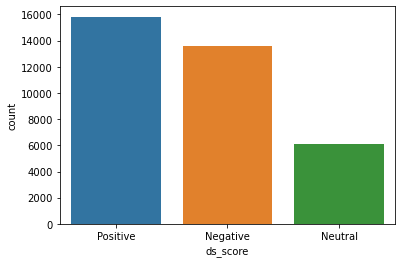

In [148]:
sns.countplot(x='ds_score', data=cnbc_new);

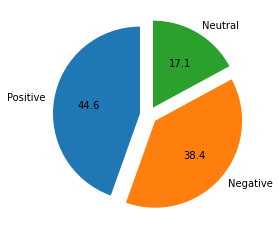

In [152]:
plt.pie([15822, 13622, 6071], explode=[0.1,0.1,0.1], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()

#### Above plot gives a clear distribution of three class types of target attribute.

`44.6% positive statments`

`38.4% negtive statements`

`17.1% neutral statments`

# Modelling on headlines + description

In [60]:
X = cnbc_new['info']
y = cnbc_new.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31963,) (3552,) (31963,) (3552,)


### LINEAR SUPPORT VECTOR MACHINE

In [83]:
# Fit the pipeline to the data
lin_svc_info = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_info.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_info.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.901463963963964
[[1212   45   91]
 [  40  502   52]
 [  73   49 1488]]
              precision    recall  f1-score   support

    Negative       0.91      0.90      0.91      1348
     Neutral       0.84      0.85      0.84       594
    Positive       0.91      0.92      0.92      1610

    accuracy                           0.90      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.90      0.90      0.90      3552



### LOGISTIC REGRESSION

In [84]:
# Fit the pipeline to the data
log_reg_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_info.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_info.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LOGISTIC REGRESSION
accuarcy score:  0.8693693693693694
[[1187   48  113]
 [  78  432   84]
 [  92   49 1469]]
              precision    recall  f1-score   support

    Negative       0.87      0.88      0.88      1348
     Neutral       0.82      0.73      0.77       594
    Positive       0.88      0.91      0.90      1610

    accuracy                           0.87      3552
   macro avg       0.86      0.84      0.85      3552
weighted avg       0.87      0.87      0.87      3552



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### MULTINOMIAL NAIVE BAYES

In [85]:
# Fit the pipeline to the data
multi_nb_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_info.fit(X_train, y_train)

# predict on test dataset
pred = multi_nb_info.predict(X_test)

print("MODEL: Multinomial NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Multinomial NB
accuarcy score:  0.6697635135135135
[[ 958    0  390]
 [ 160   13  421]
 [ 202    0 1408]]
              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72      1348
     Neutral       1.00      0.02      0.04       594
    Positive       0.63      0.87      0.74      1610

    accuracy                           0.67      3552
   macro avg       0.79      0.54      0.50      3552
weighted avg       0.73      0.67      0.61      3552



### BERNOULLI NAIVE BAYES

In [86]:
# Fit the pipeline to the data
bern_nb_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('bern_nb', BernoulliNB())])

bern_nb_info.fit(X_train, y_train)

# predict on test dataset
pred = bern_nb_info.predict(X_test)

print("MODEL: Bernoulli's NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Bernoulli's NB
accuarcy score:  0.7212837837837838
[[1007   47  294]
 [ 137  285  172]
 [ 269   71 1270]]
              precision    recall  f1-score   support

    Negative       0.71      0.75      0.73      1348
     Neutral       0.71      0.48      0.57       594
    Positive       0.73      0.79      0.76      1610

    accuracy                           0.72      3552
   macro avg       0.72      0.67      0.69      3552
weighted avg       0.72      0.72      0.72      3552



### GRADIENT BOOSTING CLASSIFICATION MODEL

In [87]:
# Fit the pipeline to the data
grad_boost_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('grad_boost', GradientBoostingClassifier())])

grad_boost_info.fit(X_train, y_train)

# predict on test dataset
pred = grad_boost_info.predict(X_test)

print("MODEL: Gradient Boosting")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print(confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Gradient Boosting
accuarcy score:  0.7243806306306306
[[ 991   24  333]
 [   4  104  486]
 [ 112   20 1478]]
              precision    recall  f1-score   support

    Negative       0.90      0.74      0.81      1348
     Neutral       0.70      0.18      0.28       594
    Positive       0.64      0.92      0.76      1610

    accuracy                           0.72      3552
   macro avg       0.75      0.61      0.61      3552
weighted avg       0.75      0.72      0.70      3552



### XGBOOST CLASSIFICATION MODEL

In [88]:
# Fit the pipeline to the data
xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xg_boost_ds.fit(X_train, enc_train)

# predict on test dataset
pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred))

#print confusion matrix
print(confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))

MODEL: XG Boost
accuarcy score:  0.8848536036036037
[[1117  106  125]
 [   3  585    6]
 [  96   73 1441]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1348
           1       0.77      0.98      0.86       594
           2       0.92      0.90      0.91      1610

    accuracy                           0.88      3552
   macro avg       0.87      0.90      0.88      3552
weighted avg       0.89      0.88      0.89      3552



## Comparing Metrics

In [70]:
model_objects = [lin_svc_info, log_reg_info, multi_nb_info, bern_nb_info, grad_boost_info, xg_boost_ds]

# list of model names
model_names = ['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost']

# comparison of models
met_info_df = metrics_comparison(model_objects,model_names, X_test, y_test, enc_test)
met_info_df

,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.901464,0.901519,0.901464,0.901448
1,LogRegression,0.869369,0.868196,0.869369,0.868227
2,MultinomialNB,0.669764,0.730264,0.669764,0.613051
3,BernoulliNB,0.721284,0.720319,0.721284,0.716517
4,GradientBoost,0.721002,0.746890,0.721002,0.693343
5,XGBoost,0.884854,0.892150,0.884854,0.885271


### Observations

>    Compared to description, model trained on both headlines and description has metrics/perfromance little lower than former one in case of Linear SVC model

> XG boost model performs well on both training set

## Working with test data

In [71]:
prediction = lin_svc_info.predict(X_test)
prediction

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [72]:
preds = pd.DataFrame(prediction, columns=['predictions'])

In [73]:
preds

,predictions
0,Negative
1,Negative
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Neutral
3550,Positive


## Prediction

In [74]:
sentence1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = lin_svc_ds.predict(sentence1)
y_predict

array(['Negative'], dtype=object)

In [75]:
sentence2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = lin_svc_ds.predict(sentence2)
y_predict

array(['Positive'], dtype=object)

## Conclusion

> we conclude that by using nltk, It is easy to classify financial news and with more appropiate training data, we can improve the accuracy of model and also can improve by tuning the hyperparamters.

> Further Deploying model on web page and testing the model are necessary to get  buisness required result.